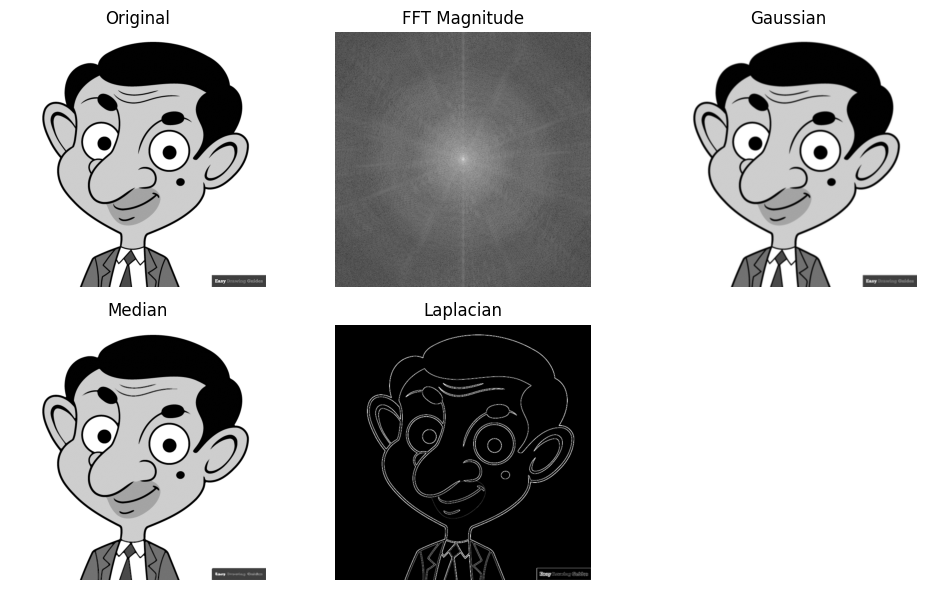

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread("/content/mr bean.webp", cv2.IMREAD_GRAYSCALE)

# 1. Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift) + 1)

# 2. Gaussian Filter (smoothing)
gaussian = cv2.GaussianBlur(img, (5,5), 1)

# 3. Median Filter (remove salt & pepper noise)
median = cv2.medianBlur(img, 5)

# 4. Laplacian Filter (edge enhancement)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Display results
titles = ['Original', 'FFT Magnitude', 'Gaussian', 'Median', 'Laplacian']
images = [img, magnitude_spectrum, gaussian, median, laplacian]

plt.figure(figsize=(10,6))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
